Jadav Bucktowar,
Rafael Nazareno,
Taimoor Khan

# Dataset info

## Resource
https://archive.ics.uci.edu/ml/datasets/wine+quality

## Description

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


# Data exploration

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.decomposition import PCA

In [0]:
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [0]:
red_wine_df = pd.read_csv(red_wine_url,';')
white_wine_df = pd.read_csv(white_wine_url,';')

In [0]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


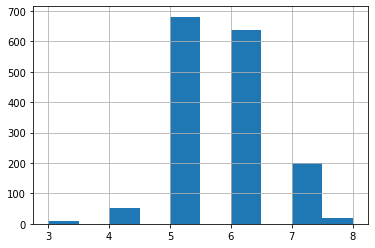

In [0]:
red_quality_hist = red_wine_df['quality'].hist()

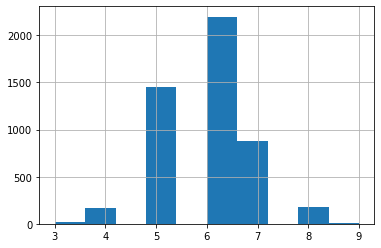

In [0]:
white_quality_hist = white_wine_df['quality'].hist()

In [0]:
def split_data(dataframe):
    return train_test_split(dataframe, test_size=0.2, random_state=42, stratify=dataframe['quality'])

In [0]:
red_train_set, red_test_set = split_data(red_wine_df)
white_train_set, white_test_set = split_data(white_wine_df)

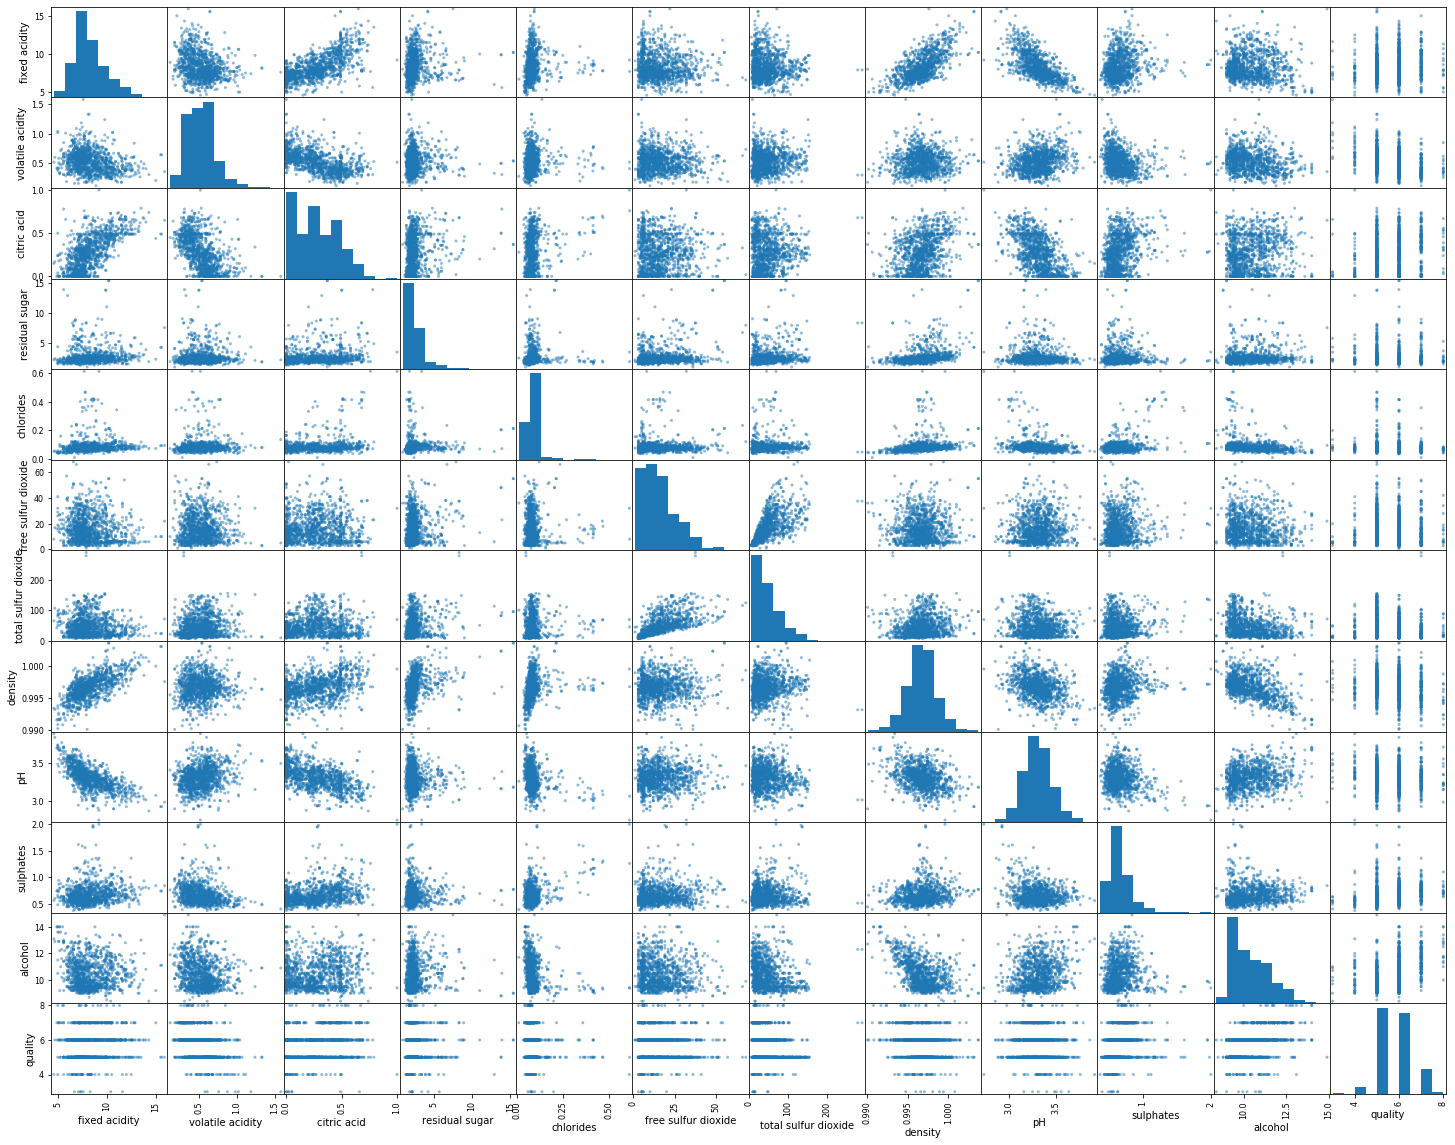

In [0]:
red_scatter_plt = pd.plotting.scatter_matrix(red_train_set, figsize=(25, 20))

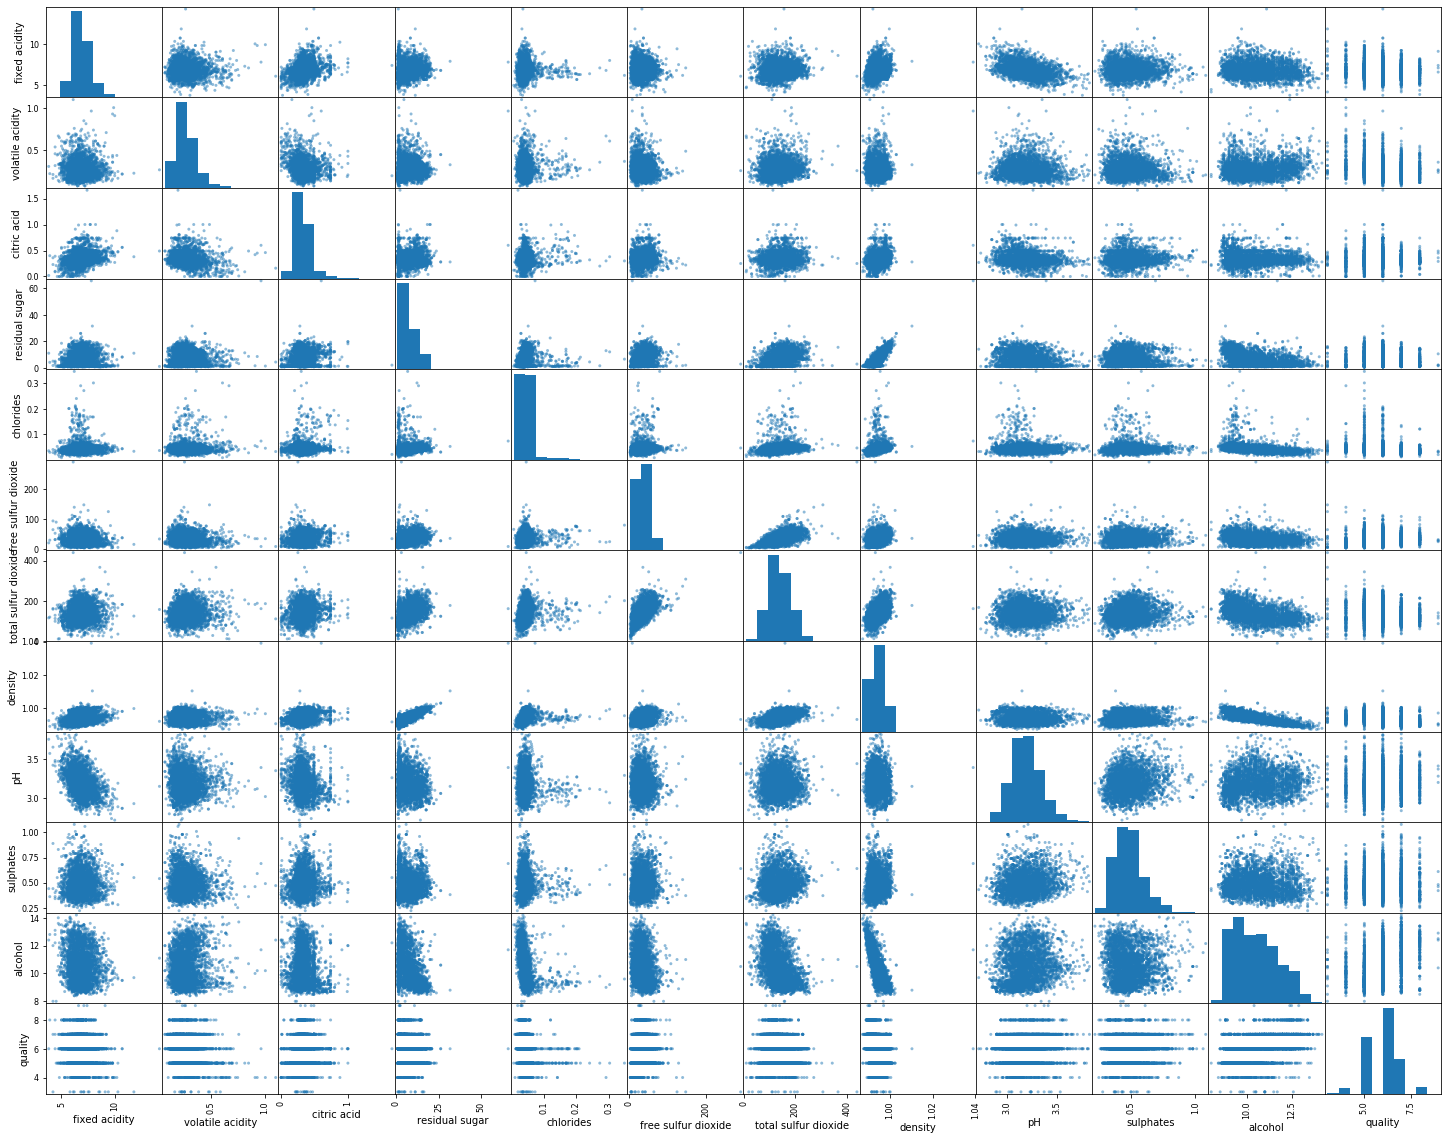

In [0]:
white_scatter_plt = pd.plotting.scatter_matrix(white_train_set, figsize=(25, 20))

## Feature selection/engineering

### Fixed acidity and citric acid
"The predominant fixed acids found in wines are tartaric, malic, citric, and succinic." Resource: https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

This is evidenced in the strong correlation between fixed acidity and citric acid. These measurements are usually in ppm. Therefore, a new attribute can be created which does not include citric acid.

### Free sulfur dioxide and total sulfur dioxide
"Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars." Resource: https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too

This is evidenced in the strong correlation between free sulfur dioxide and total sulfur dioxide. These measurements are usually in ppm. We can therefore extract the free sulfur dioxide from the total sulfur dioxide to get the bound sulfur dioxide.

### Custom transformer for added attributes

In [0]:
red_wine = red_train_set.drop('quality', axis='columns')
red_wine_labels = red_train_set['quality'].copy()

In [0]:
fixed_acidity_ix, citric_acidity_ix, free_sulfur_dioxide_ix, total_sulfur_dioxide_ix = 0, 2, 5, 6

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_acidity_no_citric = True, add_unbound_sulfur_dioxide = True):
        self.add_acidity_no_citric = add_acidity_no_citric
        self.add_unbound_sulfur_dioxide = add_unbound_sulfur_dioxide
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if self.add_acidity_no_citric:
            acidity_no_citric = X[:,fixed_acidity_ix] - X[:,citric_acidity_ix]
            return np.c_[X, acidity_no_citric]
        if self.add_unbound_sulfur_dioxide:
            unbound_sulfur_dioxide = X[:,total_sulfur_dioxide_ix] - X[:,free_sulfur_dioxide_ix]
            return np.c_[X, unbound_sulfur_dioxide]
        if self.add_acidity_no_citric and self.add_unbound_sulfur_dioxide:
            acidity_no_citric = X[:,fixed_acidity_ix] - X[:,citric_acidity_ix]
            unbound_sulfur_dioxide = X[:,total_sulfur_dioxide_ix] - X[:,free_sulfur_dioxide_ix]
            return np.c_[X, acidity_no_citric, unbound_sulfur_dioxide]
        else:
            return X

In [0]:
attr_adder = AttributesAdder(add_acidity_no_citric=False, add_unbound_sulfur_dioxide=False)
red_wine_extra_attr = attr_adder.transform(red_wine.values)

In [0]:
red_wine_extra_attr.shape

(1279, 11)

## Dimensionality reduction

With the additional two attributes, we are now at 13 attributes. While not a huge number of attributes, let's use PCA to reduce the dimensionality.

In [0]:
pca = PCA(n_components=0.95)
red_wine_extra_attr_red = pca.fit_transform(red_wine_extra_attr)

In [0]:
red_wine_extra_attr_red

array([[ -6.32135508,  14.58009458],
       [ 76.8426601 ,  34.31421538],
       [-17.10592979,  -6.69653307],
       ...,
       [ 13.22280547,  10.2954191 ],
       [-31.95079419,  -4.43073721],
       [ 14.82029913,  13.0138447 ]])

continued here: https://colab.research.google.com/drive/12uvVNa58P1uQFxwAfuoQhVehqhPQSfC1